<a href="https://colab.research.google.com/github/sun-gif/takehome-chanllenge/blob/master/UChanllenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part    1    ‑    Exploratory    data    analysis  The    attached       logins.json       file     contains     (simulated)     timestamps    of    user     logins     in    a    particular  geographic     location.     Aggregate     these     login     counts    based    on    15­ minute     time     intervals,    and  visualize     and    describe     the     resulting     time     series    of     login     counts     in    ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please     report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them

In [0]:
from google.colab import files

uploaded = files.upload()

Saving logins.json to logins.json


In [0]:
import io
import pandas as pd
df=pd.read_json(io.BytesIO(uploaded['logins.json']))

In [0]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


It looks like only have 3 and haf months data, it has some duplicate records,might caused by multi users. let's resample to 15 mins time intervals

In [0]:




# Resample in 15 minute time intervals
df.set_index('login_time', inplace=True)
df['count'] = 1
df_logins = df.resample('15T').sum()

df_logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


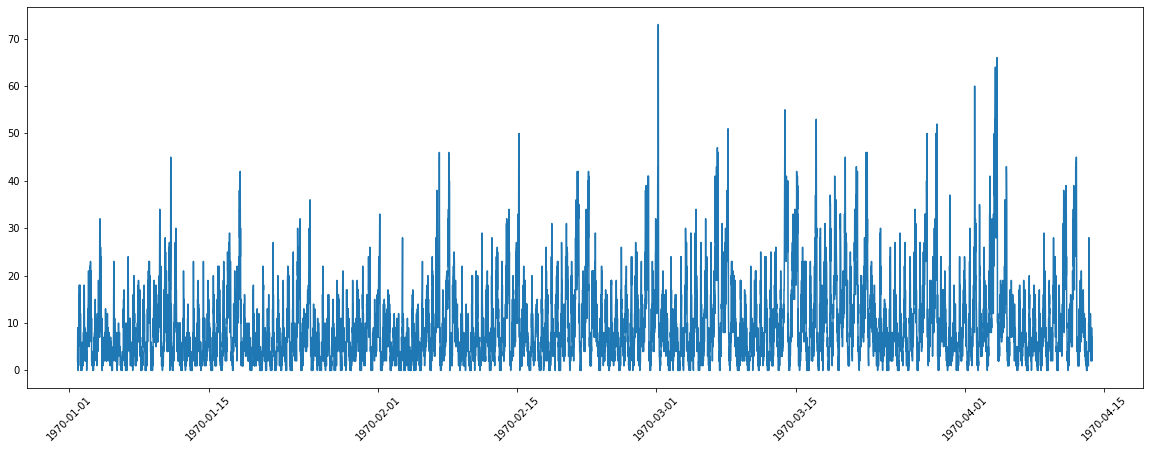

In [0]:
import matplotlib.pyplot as plt
# Show the entire series
plt.figure(figsize=(20,7))
plt.plot(df_logins)
plt.xticks(rotation=45);

Let's zoom into the first month

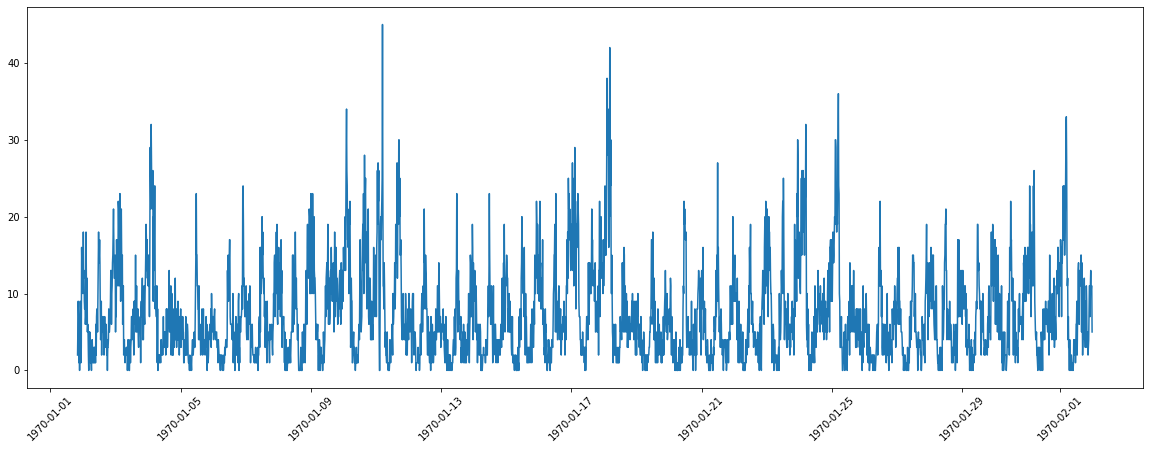

In [0]:
# Plot of the first month (january) of time series data
plt.figure(figsize=(20,7))
plt.plot(df_logins['1970-01-01': '1970-02-01'])
plt.xticks(rotation=45);

From above, it seems have some weekly patten

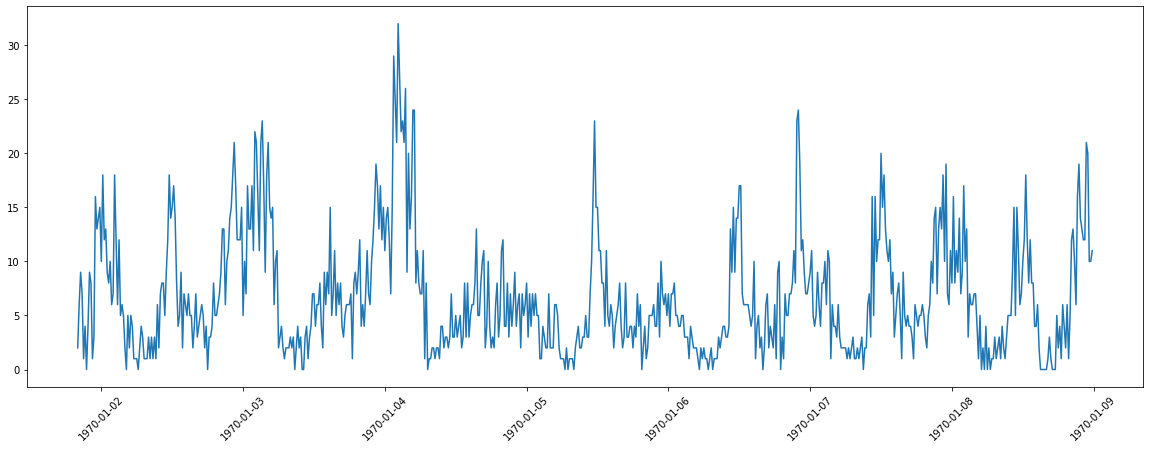

In [0]:
# Plot of the first week (start from Thursday) of time series data
plt.figure(figsize=(20,7))
plt.plot(df_logins['1970-01-01': '1970-01-08'])
plt.xticks(rotation=45);

After zoom into the first week, we can see some daily patten , it also looks like weekend is different than weekday

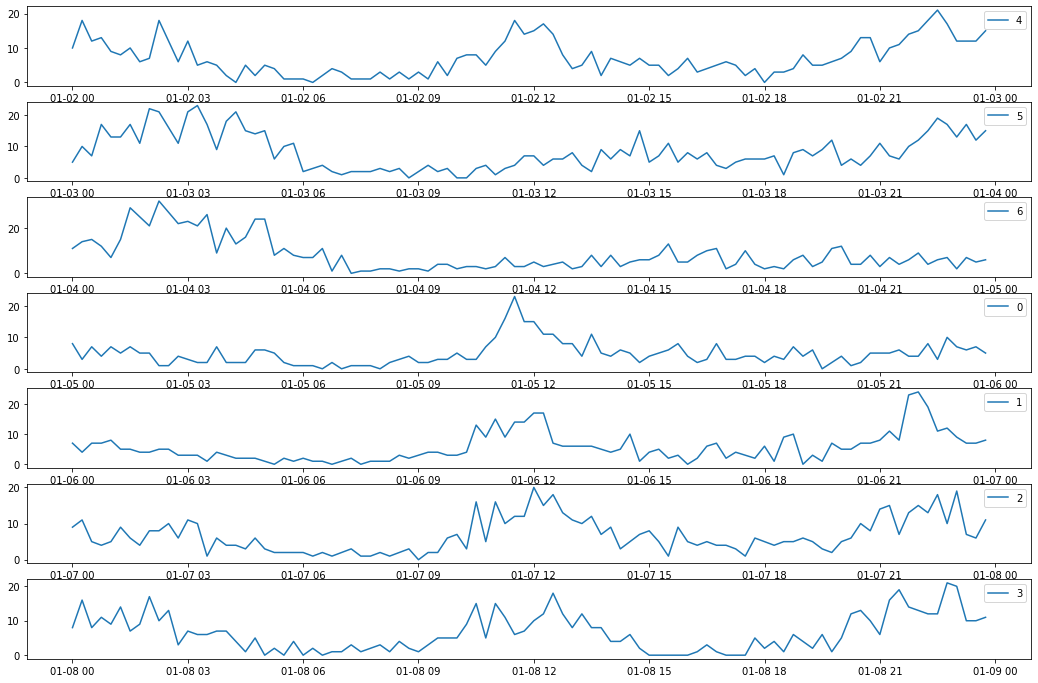

In [0]:
# Plot of the first week (daily ) of time series data

f, ax = plt.subplots(7, figsize=(18,12))
t='1970-01-01'
#df_logins.index.difference()
from datetime import datetime
from datetime import timedelta

 
for i in range(7):
   t = datetime.strptime(t,'%Y-%m-%d') 
   #t=df_logins.index.date
   t=t+timedelta(days=1)
   
   f=t.weekday()
  # t= datetime.strptime(t,'%Y-%m-%d')
   #t.day_name()
   t=t.strftime('%Y-%m-%d')


   ax[i].plot(df_logins[t:t])
   ax[i].legend(str(f))


Compare each day of the first week,We can see Weekday(0-4) has similar pattern: there are more activity around(10am-2pm) and (9pm-12am). that is probably because people have free time during lunch and after dinner. other time they are working and sleep.

weekend(5,6) has different pattern: there are more activity between 12 am to 3 am, that is make sense becasue people tend to sleep late at weekend.

In [0]:
# see trend for weeks
#extracting hours and days


df_logins['month']=df_logins.index.month

df_logins['date']=df_logins.index.date
df_logins['day']=df_logins.index.day_name()
df_logins["hour"] = df_logins.index.hour


df_logins.head()

,count,month,date,day,hour
login_time,,,,,
1970-01-01 20:00:00,2,1,1970-01-01,Thursday,20
1970-01-01 20:15:00,6,1,1970-01-01,Thursday,20
1970-01-01 20:30:00,9,1,1970-01-01,Thursday,20
1970-01-01 20:45:00,7,1,1970-01-01,Thursday,20
1970-01-01 21:00:00,1,1,1970-01-01,Thursday,21


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


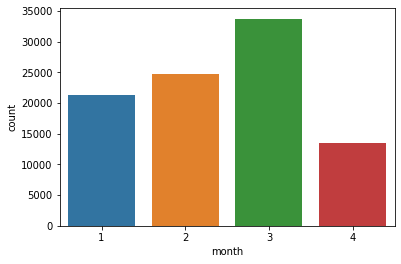

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
df_total=df_logins.groupby('month')['count'].sum()


ax = sns.barplot(df_total.index,df_total)

plt.show()

For monthly trend, it looks like increasing from Jan to March, Apr only has halt data, so we can ignor that

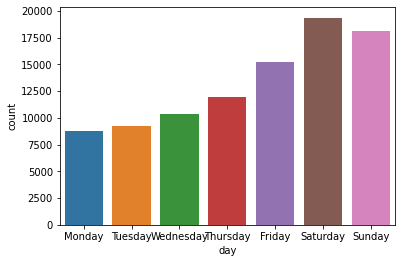

In [0]:
df_week=df_logins.groupby('day')['count'].sum()
sns.barplot(df_week.index,df_week,order=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

For weekly trend,from Monday increasing to Saturday, slightly drop on Sunday. that make sense, since people usually work hard on Monday

Part    2    ‑    Experiment    and    metrics    design  The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     
partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   a. how     you    will     implement     the    experiment  b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 


Answer 1)I would choose traffic rate on the toll bridge as key measure. if the reimbusring boost working,there will be more traffic on the bridge, we can measure one way and two way total cars by hour, day or week on this toll bridge . since people tend to shift to more active places, so if working, we should see more traffic coming from Metropolis to Gotham at night begining and oppistite traffic increase at day begining


2) A/B test will be a good practical experiment to compare pre-toll traffic and post-toll traffic. we collect 3 months traffic data before the reimbursing policy and 3 month traffic data after . we then compare hourly or daily , monthly mean value between them, we set the null hypothsis , we test for the P value,if the P-value not less than 0.005, we can say there is no significance observation before and after, the policy probably not working, or maybe not yet, collect longer time period to compare, if the P-value is less, we can say it might working, there is significent traffic incresing , we can further test when (like difference between weekday and weekend, different between day and night) and provide more information to city operations like the policy may not need to apply at weekend  or rush hour, if traffic is too busy for certain time.


Part    3    ‑    Predictive     modeling    Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     
finished     with     the     challenge.    1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?  2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).  

In [35]:
from google.colab import files

uploaded = files.upload()

Saving ultimate_data_challenge.json to ultimate_data_challenge (1).json


In [0]:
import pandas as pd
import io
df=pd.read_json(io.BytesIO(uploaded['ultimate_data_challenge.json']))

In [37]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [0]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
#df['signup_date'] = pd.to_datetime(df['signup_date'])

In [40]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [41]:
# Missing values ?

for column in list(df.columns):
    num_missing = len(df[df[column].isnull()])
    if num_missing != 0:
        print('There are {} missing values in {}'.format(num_missing, column))

There are 8122 missing values in avg_rating_of_driver
There are 396 missing values in phone
There are 201 missing values in avg_rating_by_driver


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


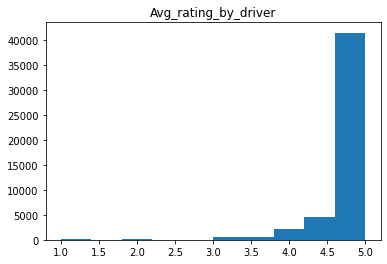

In [42]:
# Let's look at the distribution of values for avg_rating_by_driver
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df['avg_rating_by_driver'])
plt.title('Avg_rating_by_driver')
plt.show;

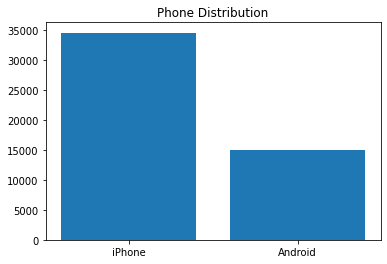

In [43]:

# Let's look at the distribution of values for phone

plt.bar([1,2], df['phone'].value_counts(), align='center')
plt.xticks([1,2], ['iPhone', 'Android'])
plt.title('Phone Distribution')
plt.show;

In [0]:
# Fill in missing values

#df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
#df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
#df['phone'].fillna('iPhone', inplace=True)

In [0]:
# Make lists of each feature type for easy plotting

numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

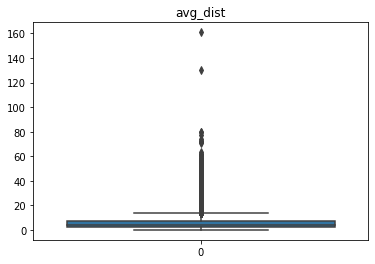

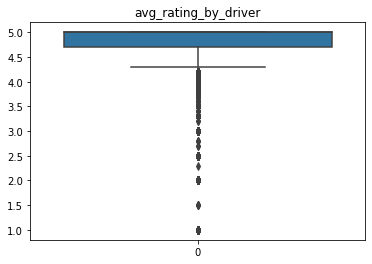

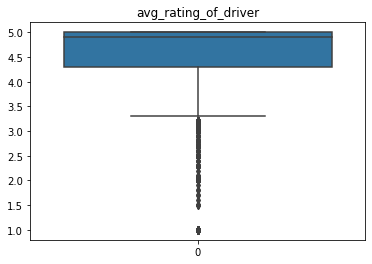

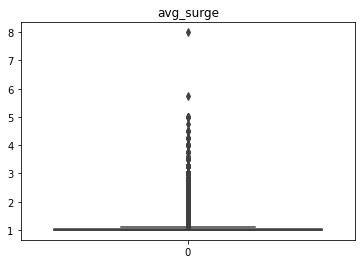

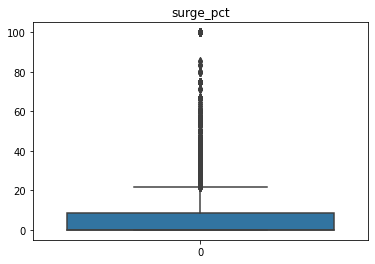

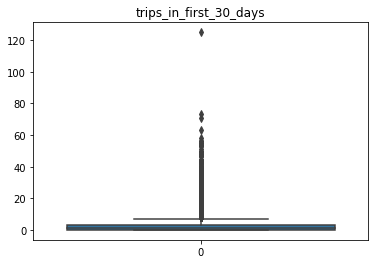

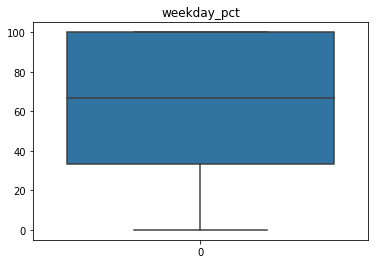

In [45]:

# Show boxplots of numerical features
import seaborn as sns

for feature in numerical_features:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show();

we can see there is some outliers for almost every numeric field. delete outliers

In [0]:
#outliers
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

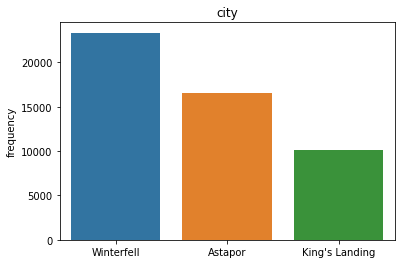

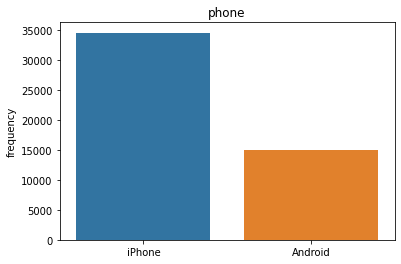

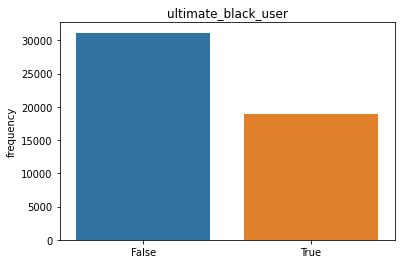

In [46]:
# Create box plots of all categorical, non-date data

for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), 
                y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

In [47]:

# Show the correlation matrix
corr_matrix = df.corr()
corr_matrix

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000


In [48]:
# Filter to see if there are any features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,0.793582,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,0.793582,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


avg_surge and surge_pct are highly correlated, if we use LR Model ,we need delete one of them

In [100]:
# When was the last trip date in the dataset?
sorted(df['last_trip_date'].unique())[-5:]

[numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]

In [101]:

print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

42.10% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


In [102]:
# Create the target variable, retained

df['retained'] = 0
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
#df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0
#df['retained']=[lambda x: 1 if df['last_trip_date'] >= '2014-06-01' else 0]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [0]:
# Drop last_trip_date
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

In [0]:

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


#Discuss why you chose your approach, 
#what alternatives you considered, and any concerns you have. 
Answer:Random forest requires less effort for data preparation during pre-processing like normalization,scaling and can handel missing values.it is
very intuitive and easy to explain to technical teams.
The predictive performance can compete with the best supervised learning algorithms. and also they provide a reliable feature importance estimate.
So I will choose Random Forest for this dataset.
Alternitavely, I will choose Logistic regression, because it easy to implement and very efficient to train.  and it outputs well-calibrated predicted probabilities. although it need some feature enginerring like removing unrelate or corelated attributes. it handel well for linear problelms, but the real data is usually not linear
#How valid is your model? 
#Include any key indicators of model performance. 
I will use Gridsearch cv 5 folder cross-validation to tune hyperparameter.
accuary score we get is 0.767488986784141.
confusion metrics shows it has high false positive and false nagtive .






In [0]:

# Drop surge_pct, since it is highly correlated with avg_surgee
#df.drop('surge_pct', axis=1, inplace=True)

In [104]:

# One-hot-encode all categorical features
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [105]:
y=df_encoded.retained
x=df_encoded.drop('retained',axis=1)
# Split into train and test sets

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=.30, 
                               random_state=42)

#train.reset_index(drop=True, inplace=True)
#test.reset_index(drop=True, inplace=True)

print('X_Train shape: {}\n X_Test shape: {}\n y_Train shape: {}\n y_Test shape: {}'.format(X_train.shape, X_test.shape,y_train.shape,y_test.shape))

X_Train shape: (26481, 14)
 X_Test shape: (11350, 14)
 y_Train shape: (26481,)
 y_Test shape: (11350,)


In [0]:
#2) Tune model parameters & evaluate



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,make_scorer
rf = RandomForestClassifier( random_state=0)
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(accuracy_score)
parameters = { 'max_features':[10, 5],'max_depth':[5,10],'n_estimators':[5,10]}

grid_obj= GridSearchCV(estimator=rf, cv=5,param_grid=parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)
# Get the estima
best_clf = grid_fit.best_estimator_

In [107]:

best_predictions = best_clf.predict(X_test)
best_clf.score(X_test,y_test)

0.767488986784141

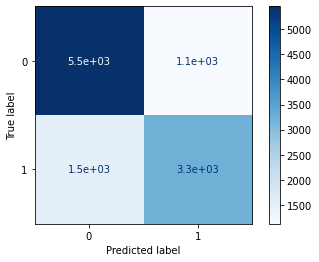

In [108]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_clf, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [0]:
importances=best_clf.feature_importances_

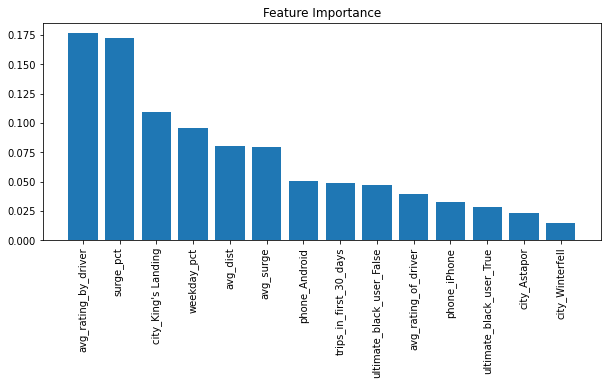

In [110]:

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_test.columns[i] for i in indices]

# Create plo
plt.figure(figsize=(10,4))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), names,rotation=90)

# Show plot
plt.show()

#Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).


The feature importance shows avg_rating_by_driver( the     rider’s    average     rating    over    all    of     their     trips), surge_pct(the    percent     of     trips     taken    with     surge    multiplier    >    1  ) play an important role for the long term rider tention. that mean centain rider with good rate and less surge are prefered by drivers. drivers usually treat the customer they like well. so there is good relatiship between them. so those riders tend to retain. for example that might be sales professional they has a lot of  business trip on a regualr bases. we might gain more information about the riders, it can help to predict the retain or not , or give centain discount to them , to retain them longer.